## Implementation of Machine Learning Algorithm using numpy

### Simple Linear Regression

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

In [2]:
# data reading
data = pd.read_csv('./dataset/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#columns
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [4]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
# Calculating coefficient b0 and b1

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients b0 and b1
print(b1, b0)

0.26342933948939945 325.57342104944223


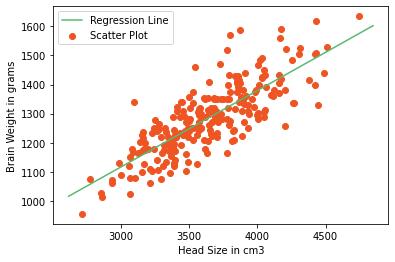

In [6]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [7]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [8]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

0.6393117199570003


### Multiple Linear Regression

In [9]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [10]:
#reading dataset
data = pd.read_csv('./dataset/student.csv')
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [11]:
#columns
data.columns

Index(['Math', 'Reading', 'Writing'], dtype='object')

In [12]:
#shape
data.shape

(1000, 3)

In [13]:
#taking value in variable
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

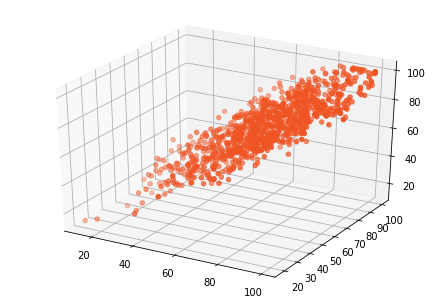

In [14]:
#scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef5423')
plt.show()

In [15]:
#define parameters
n = len(math)
x0 = np.ones(n)
X = np.array([x0, math, read]).T
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [16]:
#method for cost function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2*m)
    return J

In [17]:
cost_function(X, Y, B)

2470.11

In [18]:
#Gradient descent method
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [19]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [20]:
cost_history[-1]

10.475123473539169

In [21]:
newB

array([-0.47889172,  0.09137252,  0.90144884])

In [22]:
#method for root mean square 
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [23]:
#predicted value
Y_pred = X.dot(newB)

In [24]:
#rmse value
rmse(Y, Y_pred)

4.577143972727789

In [25]:
#method for r2 score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [26]:
#r2 score
r2_score(Y, Y_pred)

0.9097223273061553

### Logistic Regression 

In [27]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:
    @staticmethod
    def sigmoid(x):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression

        return np.dot(x, theta)

    def probability(self, theta, x):
        # Calculates the probability that an instance belongs to a particular class

        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Computes the cost function for all the training samples
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        # Computes the gradient of the cost function at the point theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        """trains the model from the training data
        Uses the fmin_tnc function that is used to find the minimum for any function
        It takes arguments as
            1) func : function to minimize
            2) x0 : initial values for the parameters
            3) fprime: gradient for the function defined by 'func'
            4) args: arguments passed to the function
        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples
        y: array-like, shape = [n_samples, n_target_values]
            Target classes
        theta: initial weights
        Returns
        -------
        self: An instance of self
        """

        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        """ Predicts the class labels
        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        predicted class labels
        """
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        """Computes the accuracy of the classifier
        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples
        actual_classes : class labels from the training data set
        probab_threshold: threshold/cutoff to categorize the samples into different classes
        Returns
        -------
        accuracy: accuracy of the model
        """
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

The accuracy of the model is 89.0
The model parameters using Gradient descent


[-25.16131854   0.20623159   0.20147149]


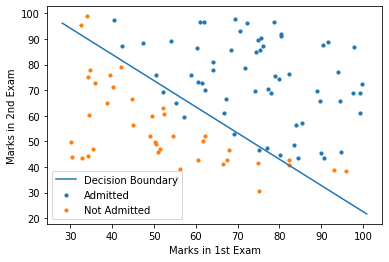

In [28]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("./dataset/marks.txt", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
                label='Not Admitted')

    # preparing the data for building the model

    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))

    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("The accuracy of the model is {}".format(accuracy))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    # plotting the decision boundary
    # As there are two features
    # wo + w1x1 + w2x2 = 0
    # x2 = - (wo + w1x1)/(w2)

    x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()   

#### Another method

In [29]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [30]:
#loading dataset
iris = datasets.load_iris()

In [31]:
#assign value into input and target variable
X = iris.data[:, :2]
y = (iris.target != 0) * 1

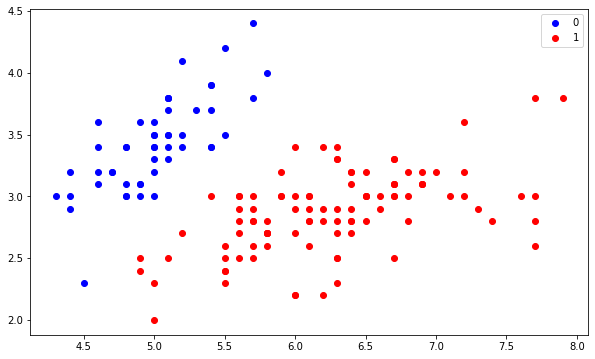

In [32]:
#plot
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [33]:
#Create Logistic class
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [34]:
#create model
model = LogisticRegression(lr=0.1, num_iter=300000)

In [35]:
#time taken
%time model.fit(X, y)

Wall time: 11 s


In [36]:
#predict
preds = model.predict(X)
(preds == y).mean()

1.0

In [37]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

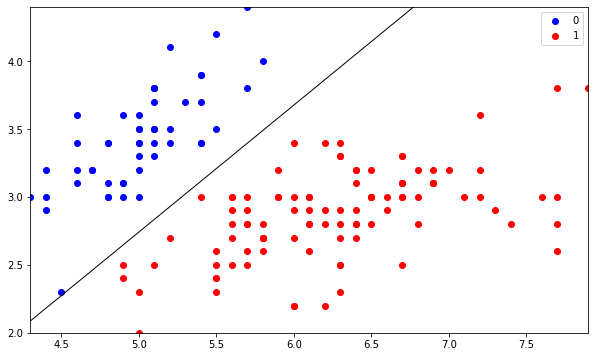

In [38]:
#plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

### Support vector machine

In [39]:
#import packages
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
#Input data
x = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])


#output label
y = np.array([-1, -1, 1, 1, 1])

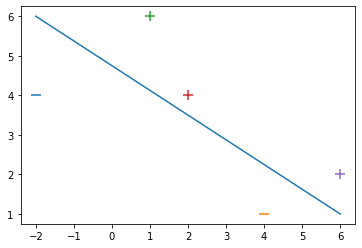

In [41]:
for val, inp in enumerate(x):
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

plt.plot([-2,6],[6,1])

In [42]:
#method for support vector classifier
def svm_function(x,y):
    #initilizing weight
    w = np.zeros(len(x[0]))
    #initialize learning rate
    l_rate = 1
    #epoch
    epoch = 100000
    #output list
    out = []
    #training svm
    for e in range(epoch):
        for i, val in enumerate(x):
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
            else:
                w = w + l_rate * (-2*(1/epoch)*w)
    
    for i, val in enumerate(x):
        out.append(np.dot(x[i], w))
    
    return w, out

In [43]:
#apply method
w, out = svm_function(x,y)

In [44]:
#print
print('Calculated weights')
print(w)

Calculated weights
[ 1.50157001  3.00057251 10.50863266]


In [45]:
#print output
print('predicted output')
print(out)

predicted output
[-1.509482661019593, -1.5017801059577938, 8.996372385026156, 4.496797386268188, 4.501932422976054]


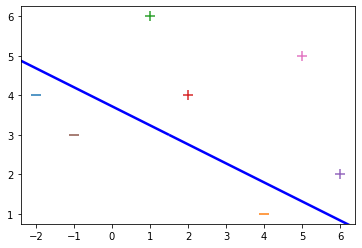

In [46]:
#plotting    
for val, inp in enumerate(x):
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

plt.scatter(-1,3, s=100, marker='_', linewidths=5)   
plt.scatter(5,5, s=100, marker='+', linewidths=5)   


x1=[w[0],w[1],-w[1],w[0]]
x2=[w[0],w[1],w[1],-w[0]]

x1x2 =np.array([x1,x2])
X,Y,U,V = zip(*x1x2)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

In [47]:
#take random value
u = np.array([
    [-1,3,-1],
    [5,5,-1],
    
])

In [48]:
#predict value
predicted_val = []
for i, val in enumerate(u):
        predicted_val.append(np.dot(u[i], w))

In [49]:
print('test result')
print(predicted_val)

test result
[-3.0084851544876052, 12.002079927023981]


#### Classification And Regression Decision Trees
##### Gini Index

In [50]:
# import packages
from random import seed
from random import randrange
from csv import reader

In [51]:
# method to Load a CSV file
def load_csv(filename):
    file = open(filename, "rt")
    lines = reader(file)
    dataset = list(lines)
    return dataset
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini
 
# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

In [52]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root
 
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
 
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return(predictions)
 
# Test CART on Bank Note dataset
seed(1)
# load and prepare Bank Note dataset
filename = './dataset/data_banknote_authentication.txt'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# evaluate algorithm
n_folds = 5
max_depth = 5
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [96.35036496350365, 97.08029197080292, 97.44525547445255, 98.17518248175182, 97.44525547445255]
Mean Accuracy: 97.299%


##### Entropy Method

In [53]:
#Methods
def entropy_func(c, n):
    """
    The math formula
    """
    return -(c*1.0/n)*math.log(c*1.0/n, 2)

def entropy_cal(c1, c2):
    """
    Returns entropy of a group of data
    c1: count of one class
    c2: count of another class
    """
    if c1== 0 or c2 == 0:  # when there is only one class in the group, entropy is 0
        return 0
    return entropy_func(c1, c1+c2) + entropy_func(c2, c1+c2)

# get the entropy of one big circle showing above
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    s = 0
    n = len(division)
    classes = set(division)
    for c in classes:   # for each class, get entropy
        n_c = sum(division==c)
        e = n_c*1.0/n * entropy_cal(sum(division==c), sum(division!=c)) # weighted avg
        s += e
    return s, n

# The whole entropy of two big circles combined
def get_entropy(y_predict, y_real):
    """
    Returns entropy of a split
    y_predict is the split decision, True/Fasle, and y_true can be multi class
    """
    if len(y_predict) != len(y_real):
        print('They have to be the same length')
        return None
    n = len(y_real)
    s_true, n_true = entropy_of_one_division(y_real[y_predict]) # left hand side entropy
    s_false, n_false = entropy_of_one_division(y_real[~y_predict]) # right hand side entropy
    s = n_true*1.0/n * s_true + n_false*1.0/n * s_false # overall entropy, again weighted average
    return s

In [54]:
class DecisionTreeClassifier(object):
    def __init__(self, max_depth):
        self.depth = 0
        self.max_depth = max_depth
    
    def fit(self, x, y, par_node={}, depth=0):
        if par_node is None: 
            return None
        elif len(y) == 0:
            return None
        elif self.all_same(y):
            return {'val':y[0]}
        elif depth >= self.max_depth:
            return None
        else: 
            col, cutoff, entropy = self.find_best_split_of_all(x, y)    # find one split given an information gain 
            y_left = y[x[:, col] < cutoff]
            y_right = y[x[:, col] >= cutoff]
            par_node = {'col': iris.feature_names[col], 'index_col':col,
                        'cutoff':cutoff,
                       'val': np.round(np.mean(y))}
            par_node['left'] = self.fit(x[x[:, col] < cutoff], y_left, {}, depth+1)
            par_node['right'] = self.fit(x[x[:, col] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.trees = par_node
            return par_node
    
    def find_best_split_of_all(self, x, y):
        col = None
        min_entropy = 1
        cutoff = None
        for i, c in enumerate(x.T):
            entropy, cur_cutoff = self.find_best_split(c, y)
            if entropy == 0:    # find the first perfect cutoff. Stop Iterating
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col = i
                cutoff = cur_cutoff
        return col, cutoff, min_entropy
    
    def find_best_split(self, col, y):
        min_entropy = 10
        n = len(y)
        for value in set(col):
            y_predict = col < value            
            my_entropy = get_entropy(y_predict, y)
            if my_entropy <= min_entropy:
                min_entropy = my_entropy
                cutoff = value
        return min_entropy, cutoff
    
    def all_same(self, items):
        return all(x == items[0] for x in items)
                                           
    def predict(self, x):
        tree = self.trees
        results = np.array([0]*len(x))
        for i, c in enumerate(x):
            results[i] = self._get_prediction(c)
        return results
    
    def _get_prediction(self, row):
        cur_layer = self.trees
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

In [55]:
from sklearn.datasets import load_iris
from pprint import pprint
import math
from utils import train_test_split, normalize, accuracy_score, Plot

data = datasets.load_iris()
X = normalize(data.data[data.target != 0])
y = data.target[data.target != 0]
y[y == 1] = -1
y[y == 2] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)
pprint(clf.fit(X_train, y_train))
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print ("Accuracy:", accuracy)

{'col': 'petal length (cm)',
 'cutoff': 0.5614915202144439,
 'index_col': 2,
 'left': {'col': 'petal width (cm)',
          'cutoff': 0.24445962059267845,
          'index_col': 3,
          'left': {'val': -1},
          'right': {'val': 1},
          'val': -1.0},
 'right': {'col': 'petal length (cm)',
           'cutoff': 0.5790901534026813,
           'index_col': 2,
           'left': {'col': 'petal width (cm)',
                    'cutoff': 0.2089213265942806,
                    'index_col': 3,
                    'left': {'val': -1},
                    'right': {'col': 'sepal width (cm)',
                              'cutoff': 0.3788906309109069,
                              'index_col': 1,
                              'left': {'val': 1},
                              'right': {'val': -1},
                              'val': 1.0},
                    'val': 0.0},
           'right': {'val': 1},
           'val': 1.0},
 'val': 0.0}
Accuracy: 0.9696969696969697


#### Random Forest

In [56]:
# import packages
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [57]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini
 
# Select the best split point for a dataset
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, n_features, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, n_features, 1)
    return root
 
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
 
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample
 
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)
 
# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

In [58]:
# Test the random forest algorithm
seed(2)
# load and prepare Sonar Dataset
filename = './dataset/sonar.all-data.csv'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(0, len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
for n_trees in [1, 5, 10]:
    scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Trees: 1
Scores: [56.09756097560976, 63.41463414634146, 60.97560975609756, 58.536585365853654, 73.17073170731707]
Mean Accuracy: 62.439%
Trees: 5
Scores: [70.73170731707317, 58.536585365853654, 85.36585365853658, 75.60975609756098, 63.41463414634146]
Mean Accuracy: 70.732%
Trees: 10
Scores: [82.92682926829268, 75.60975609756098, 97.5609756097561, 80.48780487804879, 68.29268292682927]
Mean Accuracy: 80.976%


#### Gradient Descent

In [59]:
import numpy as np

def gradient_descent_runner(points, starting_m, starting_b, learning_rate, num_iterations):
    m = starting_m
    b = starting_b

    for i in range(num_iterations):
        m, b = step_gradient(m, b, np.array(points), learning_rate)

    return m, b

In [60]:
#Method for step gradient
def step_gradient(current_m, current_b, points, learning_rate):
    #gradient descent
    m_gradient = 0
    b_gradient = 0

    #Calculate optimal values for model

    #To calculate the gradient we need to calculate 
    #the partial derivative of m and b
    n = float(len(points))

    sum_m = 0
    sum_b = 0

    for point in points:
        sum_m += -1 * point[0] * (point[1] - (current_m * point[0] + current_b))
        sum_b += -1 * (point[1] - (current_m * point[0] + current_b))

    m_gradient = (2 / n) * sum_m
    b_gradient = (2 / n) * sum_b

    m_new = current_m - (learning_rate * m_gradient)
    b_new = current_b - (learning_rate * b_gradient)

    return m_new, b_new

In [61]:
#Method to compute error
def compute_error_for_given_points(m, b, points):
    #sum of squared errors
    sum_error = 0
    for i in range(len(points)):
        point = points[i]
        sum_error += (point[1] - (m * point[0] + b)) ** 2

    return sum_error / float(len(points))

In [62]:
points = np.genfromtxt("./dataset/data_banknote_authentication.txt", delimiter=",")

#Hyperparameter - Tuning knobs in ML for our model

learning_rate = 0.0001 

#y = mx + b (slope formula). m = slope and b = y-intercept
initial_b = 0
initial_m = 0
initial_error = compute_error_for_given_points(initial_m, initial_b, points)

print("Starting gradient descent m=", initial_m, " and b=", initial_b, " with an error=", initial_error)

#Depends on the size of the dataset
num_iterations = 1000

[m, b] = gradient_descent_runner(points, initial_m, initial_b, learning_rate, num_iterations)

error = compute_error_for_given_points(m, b, points)

print("After 1000 iterations m=", m, " and b=", b, " with an error=", error)

Starting gradient descent m= 0  and b= 0  with an error= 38.11604499772437
After 1000 iterations m= 0.5034004752145569  and b= 0.3227008315683535  with an error= 33.94321688323647


#### Stocastic Gradient Descent

In [63]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse
def sigmoid_activation(x):
    # compute and return the sigmoid activation value for a
    # given input value
    return 1.0 / (1 + np.exp(-x))
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


[INFO] starting training...


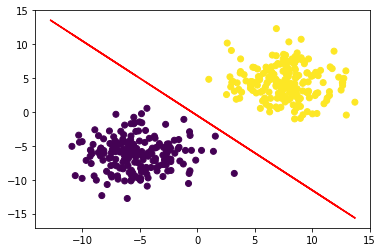

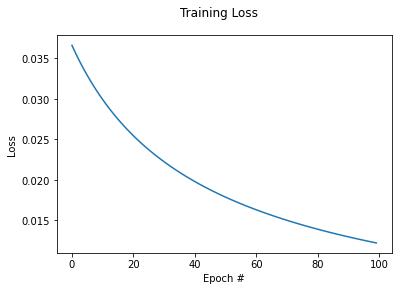

In [64]:
# generate a 2-class classification problem with 400 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=400, n_features=2, centers=2,
    cluster_std=2.5, random_state=95)
    
# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]
# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))
# initialize a list to store the loss value for each epoch
lossHistory = []
epochs=100
batch_size=32
alpha=.01
# loop over the desired number of epochs
for epoch in np.arange(0,epochs ):
    # initialize the total loss for the epoch
    epochLoss = []
    # loop over our data in batches
    for (batchX, batchY) in next_batch(X, y,batch_size):
        # take the dot product between our current batch of
        # features and weight matrix `W`, then pass this value
        # through the sigmoid activation function
        preds = sigmoid_activation(batchX.dot(W))
        # now that we have our predictions, we need to determine
        # our `error`, which is the difference between our predictions
        # and the true values
        error = preds - batchY
        # given our `error`, we can compute the total loss value on
        # the batch as the sum of squared loss
        loss = np.sum(error ** 2)
        epochLoss.append(loss)
        # the gradient update is therefore the dot product between
        # the transpose of our current batch and the error on the
        # # batch
        gradient = batchX.T.dot(error) / batchX.shape[0]
        # use the gradient computed on the current batch to take
        # a "step" in the correct direction
        W += -alpha * gradient
    # update our loss history list by taking the average loss
    # across all batches
    lossHistory.append(np.average(epochLoss))
    
# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X)) / W[2]
# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")
# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0,epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

#### K-Nearest Neighbors

In [65]:
## Imports and Loading Data

import numpy as np
import matplotlib.pyplot as plt
import operator
#import scipy
from scipy.special import expit
%matplotlib inline

X_train = np.genfromtxt('./dataset/KNN/X_train.csv', delimiter=',')
y_train = np.genfromtxt('./dataset/KNN/y_train.csv')

X_test = np.genfromtxt('./dataset/KNN/X_test.csv', delimiter=',')
y_test = np.genfromtxt('./dataset/KNN/y_test.csv')

In [66]:
#method for euclidean distance and absolute distance
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector1-vector2, 2)))
def absolute_distance(vector1, vector2):
    return np.sum(np.absolute(vector1-vector2))

In [67]:
#Get Neighbour Mehtod
def get_neighbours(X_train, X_test_instance, k):
    distances = []
    neighbors = []
    for i in range(0, X_train.shape[0]):
        dist = absolute_distance(X_train[i], X_test_instance)
        distances.append((i, dist))
    distances.sort(key=operator.itemgetter(1))
    for x in range(k):       
        neighbors.append(distances[x][0])
    return neighbors

In [68]:
#KNN class 
def predictkNNClass(output, y_train):
    classVotes = {}
    for i in range(len(output)):
        if y_train[output[i]] in classVotes:
            classVotes[y_train[output[i]]] += 1
        else:
            classVotes[y_train[output[i]]] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)    
    return sortedVotes[0][0]

In [69]:
#KNN Test Predict
def kNN_test(X_train, X_test, Y_train, Y_test, k):
    output_classes = []
    for i in range(0, X_test.shape[0]):
        output = get_neighbours(X_train, X_test[i], k)
        predictedClass = predictkNNClass(output, Y_train)
        output_classes.append(predictedClass)
    return output_classes

In [70]:
#Accuracy Predict
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    
    return float(count)/len(predicted_labels)

In [71]:
predicted_classes = {}
final_accuracies = {}
for k in range(1, 21):
    predicted_classes[k] = kNN_test(X_train, X_test, y_train, y_test, k)
    final_accuracies[k] = prediction_accuracy(predicted_classes[k], y_test)

In [72]:
final_accuracies.values()

dict_values([0.8924731182795699, 0.8924731182795699, 0.8602150537634409, 0.8709677419354839, 0.8817204301075269, 0.8924731182795699, 0.8602150537634409, 0.8709677419354839, 0.9032258064516129, 0.8709677419354839, 0.8494623655913979, 0.8709677419354839, 0.8817204301075269, 0.8817204301075269, 0.8602150537634409, 0.8709677419354839, 0.8494623655913979, 0.8709677419354839, 0.8602150537634409, 0.8817204301075269])

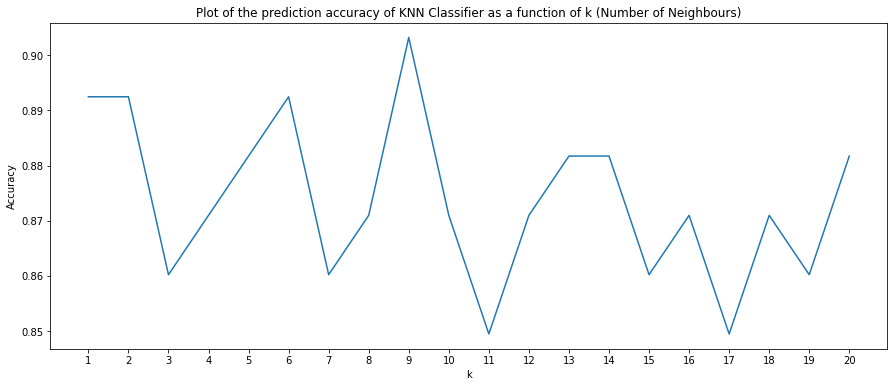

In [73]:
#showing prediction accuracy
plt.figure(figsize=(15, 6))
plt.plot(list(final_accuracies.keys()), list(final_accuracies.values()))
plt.xticks(list(final_accuracies.keys()))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Plot of the prediction accuracy of KNN Classifier as a function of k (Number of Neighbours)")
plt.show()

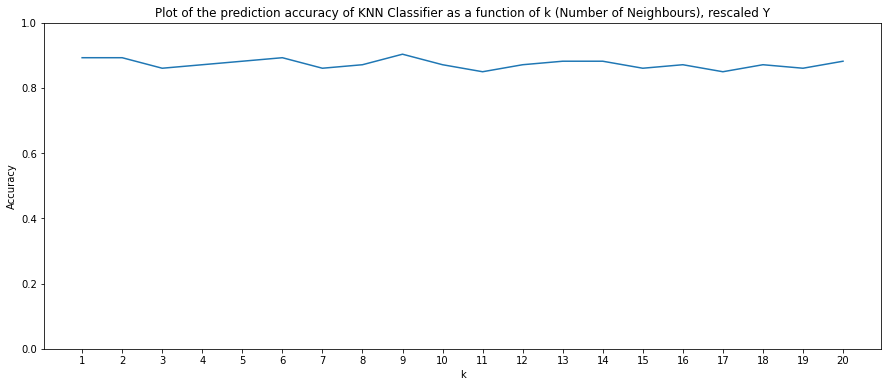

In [74]:
#Showing accuracy by adjusted y-scale between 0 and 1
plt.figure(figsize=(15, 6))
plt.plot(list(final_accuracies.keys()), list(final_accuracies.values()))
plt.ylim([0, 1])
plt.xticks(list(final_accuracies.keys()))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Plot of the prediction accuracy of KNN Classifier as a function of k (Number of Neighbours), rescaled Y")
plt.show()

#### Gaussian Naive bayes

In [75]:
#import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

#### Iris dataset and scatter plot, Sepal length vs sepal width

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


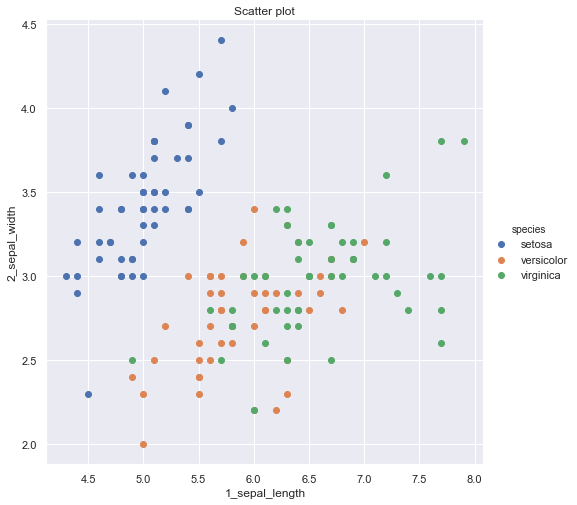

In [76]:
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [77]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

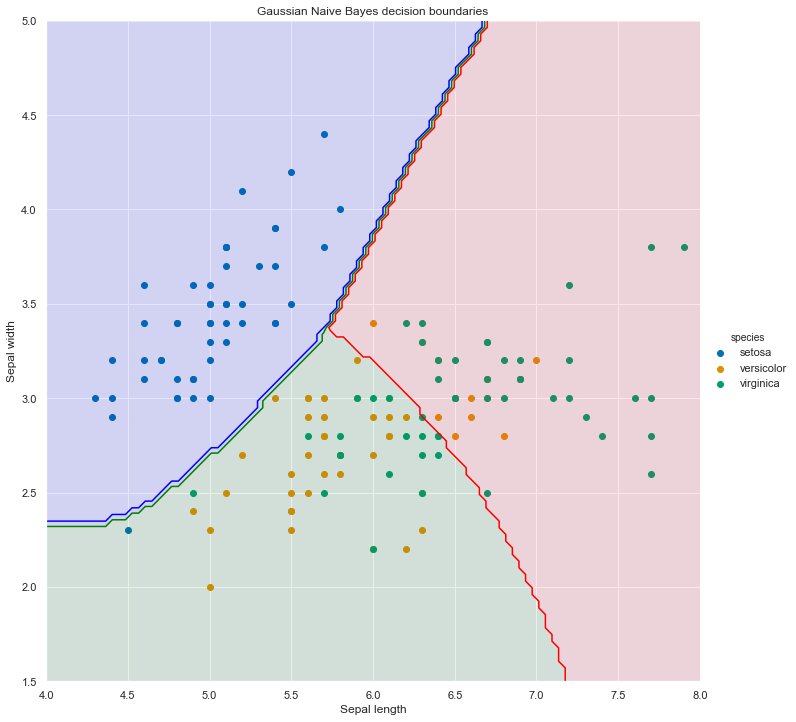

In [78]:
#Plotting the decision boundaries
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

#### Principal Component Analysis (PCA) implementation using numpy

In [79]:
import numpy as np

np.random.seed(23423) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gradient', 'clf', 'grid', 'seed', 'split', 'sqrt', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


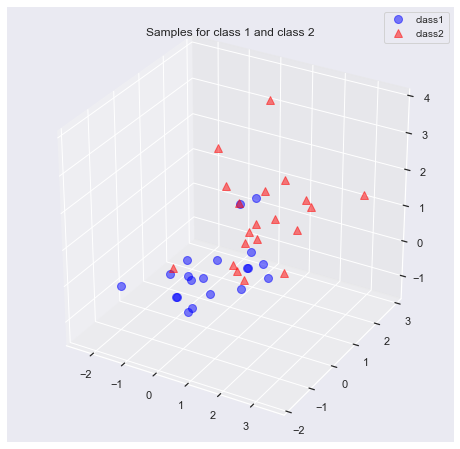

In [80]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [81]:
#taking the whole dataset and ignoring the class
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [82]:
#computing the D-dimensionals mean vectors
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.59630221]
 [0.47965616]
 [0.56413655]]


In [83]:
#computing the scatter matrix
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[54.75723353  1.26043387 28.81217483]
 [ 1.26043387 50.1514903   6.1323721 ]
 [28.81217483  6.1323721  54.57258159]]


In [84]:
#computing the covarience matrix
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.40403163 0.03231882 0.73877371]
 [0.03231882 1.28593565 0.15724031]
 [0.73877371 0.15724031 1.39929696]]


In [85]:
#computing eigen vectors and eigen values
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.69361894]
 [-0.15212732]
 [-0.70409519]]
Eigenvalue 1 from scatter matrix: 84.28102398595225
Eigenvalue 1 from covariance matrix: 2.1610518970756996
Scaling factor:  38.999999999999986
----------------------------------------
Eigenvector 2: 
[[-0.68995971]
 [-0.14057467]
 [ 0.71006645]]
Eigenvalue 2 from scatter matrix: 25.362222282246467
Eigenvalue 2 from covariance matrix: 0.6503133918524734
Scaling factor:  39.00000000000001
----------------------------------------
Eigenvector 3: 
[[ 0.20699845]
 [-0.97831285]
 [ 0.00745647]]
Eigenvalue 3 from scatter matrix: 49.83805915321693
Eigenvalue 3 from covariance matrix: 1.2778989526465878
Scaling factor:  39.00000000000001
----------------------------------------


In [86]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


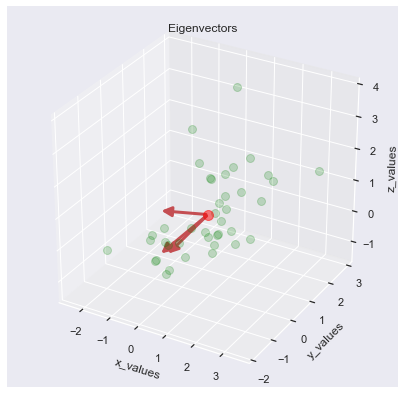

In [87]:
#visualization of eigen vectors
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [88]:
#sorting the eigen vectos by decresing eigen values
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [89]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

84.28102398595225
49.83805915321693
25.362222282246467


In [90]:
#choosing k eigenvectors with largest eigenvalues
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.69361894  0.20699845]
 [-0.15212732 -0.97831285]
 [-0.70409519  0.00745647]]


In [91]:
#Transforming the sample into new sub space
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

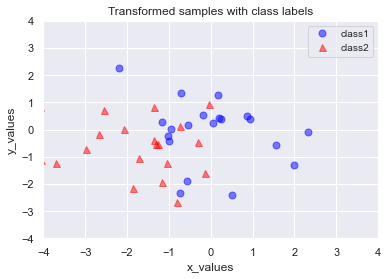

In [92]:
#ploting the values
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

#### Linear Discriminant Analysis Dimension Reduction

In [93]:
#Define feature dictionary
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

In [94]:
#reading dataset
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='./dataset/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [95]:
#encoding
from sklearn.preprocessing import LabelEncoder

X = df[["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm"]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

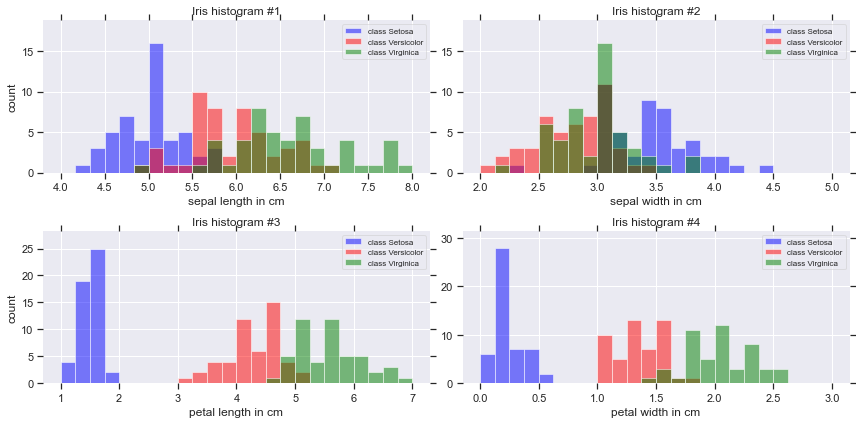

In [96]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

In [97]:
#LDA steps
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [5.006 3.418 1.464 0.244]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



In [98]:
#computing the scatter matrix
S_W = np.zeros((4,4))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [99]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 63.2121 -19.534  165.1647  71.3631]
 [-19.534   10.9776 -56.0552 -22.4924]
 [165.1647 -56.0552 436.6437 186.9081]
 [ 71.3631 -22.4924 186.9081  80.6041]]


In [100]:
#Solving generalize eigen value problem
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.2049]
 [ 0.3871]
 [-0.5465]
 [-0.7138]]
Eigenvalue 1: 3.23e+01

Eigenvector 2: 
[[-0.009 ]
 [-0.589 ]
 [ 0.2543]
 [-0.767 ]]
Eigenvalue 2: 2.78e-01

Eigenvector 3: 
[[-0.8379]
 [ 0.1696]
 [ 0.1229]
 [ 0.5041]]
Eigenvalue 3: -4.13e-15

Eigenvector 4: 
[[ 0.2   ]
 [-0.3949]
 [-0.4567]
 [ 0.7717]]
Eigenvalue 4: 1.20e-14


In [101]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [102]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.27195779972981
0.27756686384004264
1.1953730364935478e-14
4.1311796919088535e-15


In [103]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 99.15%
eigenvalue 2: 0.85%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [104]:
#choosing k eigen vectors with larger eigen values
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.2049 -0.009 ]
 [ 0.3871 -0.589 ]
 [-0.5465  0.2543]
 [-0.7138 -0.767 ]]


In [105]:
#Transforming the samples into new sub space
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

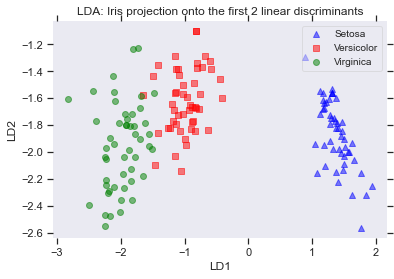

In [106]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

#### Multi Class Gaussian Discriminant Analyses

In [107]:
import numpy as np   

class GDAClassifier:
    
    def fit(self, X, y, epsilon = 1e-10):
        self.y_classes, y_counts = np.unique(y, return_counts=True)
        self.phi_y = 1.0 * y_counts/len(y)
        self.u = np.array([ X[y==k].mean(axis=0) for k in self.y_classes])
        self.E = self.compute_sigma(X, y)
        self.E += np.ones_like(self.E) * epsilon # fix zero overflow
        self.invE = np.linalg.pinv(self.E)
        return self
    
    def compute_sigma(self,X, y):
        X_u = X.copy().astype('float64')
        for i in range(len(self.u)):
            X_u[y==self.y_classes[i]] -= self.u[i]
        return X_u.T.dot(X_u) / len(y)

    def predict(self, X):
        return np.apply_along_axis(self.get_prob, 1, X)
    
    def score(self, X, y):
        return (self.predict(X) == y).mean()
    
    def get_prob(self, x):
        p = np.exp(-0.5 * np.sum((x - self.u).dot(self.invE) * (x - self.u), axis =1)) * self.phi_y
        print(p)
        return np.argmax(p)

In [108]:
from utils import train_test_split
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8)
model = GDAClassifier().fit(X_train,y_train)

In [109]:
model.score(X_test,y_test)

[1.0105e-52 1.9938e-05 1.6887e-09]
[8.5105e-02 5.2611e-34 2.9151e-77]
[2.5059e-01 1.3881e-35 5.6819e-79]
[1.5945e-01 6.6612e-36 6.3120e-80]
[8.9045e-35 2.2813e-01 2.7634e-10]
[4.1835e-41 1.9649e-01 2.1001e-07]
[5.5607e-37 3.6352e-03 6.9482e-13]
[9.4006e-02 1.6301e-35 1.2551e-79]
[3.9516e-47 1.6227e-03 3.3548e-06]
[3.2893e-28 1.5801e-02 8.0074e-17]
[1.2456e-01 8.3182e-33 2.3670e-74]
[2.6998e-28 6.7711e-02 1.6167e-15]
[4.1728e-40 2.9260e-02 1.2895e-08]
[8.9224e-83 5.3392e-13 2.2989e-03]
[2.5191e-02 1.5528e-36 1.5828e-78]
[2.7214e-53 1.9982e-03 7.4943e-04]
[5.0021e-84 4.6381e-13 1.3107e-01]
[2.6635e-83 3.6896e-14 3.5102e-04]
[5.0062e-62 8.9829e-06 1.5594e-04]
[3.3471e-36 6.5378e-02 1.7193e-12]
[2.3639e-90 5.6906e-17 4.5495e-03]
[2.3658e-66 5.0585e-07 9.2257e-02]
[1.2071e-71 6.3778e-09 1.6943e-03]
[2.4299e-99 1.2808e-19 6.0441e-04]
[3.5421e-02 1.1568e-37 6.7053e-83]
[1.9481e-64 3.3697e-06 3.1376e-03]
[1.9793e-40 1.3920e-02 1.9317e-10]
[5.0090e-36 2.3846e-01 1.7918e-09]
[5.2125e-55 6.5944e-

0.9333333333333333

In [110]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8)
model = GDAClassifier().fit(X_train,y_train)
model.score(X_test,y_test)

[6.2257e-15 3.6432e-19]
[2.5238e-11 3.5030e-06]
[7.8460e-14 2.1782e-06]
[2.5336e-19 6.3946e-27]
[4.1859e-28 4.8519e-20]
[4.5885e-06 2.7001e-04]
[4.3236e-06 4.4634e-03]
[3.4204e-09 7.2356e-04]
[5.9961e-18 3.6385e-21]
[3.0371e-07 8.7835e-14]
[7.2845e-05 4.3796e-08]
[6.3127e-18 6.2763e-31]
[2.9400e-18 6.7648e-11]
[1.1033e-12 3.8690e-09]
[1.3787e-10 5.7853e-07]
[1.1154e-09 2.4747e-03]
[1.5960e-17 2.5304e-10]
[2.8069e-08 8.4960e-07]
[1.0157e-08 2.8335e-19]
[3.5356e-07 1.4587e-06]
[1.5272e-09 2.1256e-05]
[4.4684e-30 2.7103e-35]
[4.0911e-10 3.8569e-05]
[9.8333e-10 1.0304e-05]
[5.3459e-07 2.4362e-12]
[1.5988e-12 1.1045e-09]
[2.7284e-19 2.7728e-29]
[1.4421e-12 4.6336e-22]
[6.7654e-09 3.5525e-05]
[2.7998e-10 4.8233e-16]
[8.5631e-60 1.6057e-58]
[1.2755e-07 7.0926e-06]
[6.0051e-113 3.4963e-104]
[7.7009e-10 5.5581e-06]
[4.4662e-08 4.3268e-10]
[4.0368e-10 3.3352e-04]
[2.8607e-07 3.0496e-04]
[6.7999e-07 5.2155e-06]
[7.7913e-08 3.4340e-04]
[1.8707e-146 1.1449e-150]
[4.4186e-06 1.5543e-16]
[1.5379e-10 

[6.7233e-30 4.4209e-21]
[9.8972e-11 1.7181e-08]
[1.6173e-12 3.4661e-21]
[7.8546e-12 4.8590e-05]
[3.3492e-12 6.4469e-09]
[9.6164e-08 1.3413e-04]
[1.3312e-08 3.6761e-04]
[3.8668e-18 1.6658e-11]
[2.0071e-45 9.7492e-56]
[9.9255e-07 7.4471e-11]
[3.8917e-08 3.2211e-03]
[1.5137e-09 1.5338e-06]
[1.8766e-15 6.4921e-27]
[2.2287e-09 3.1603e-04]
[1.9414e-77 2.7668e-67]
[1.3711e-18 4.4942e-11]
[5.090e-14 1.959e-13]
[2.1106e-50 1.0537e-36]
[7.3156e-12 7.2237e-13]
[2.6256e-13 5.5222e-07]
[5.7199e-26 7.4773e-28]
[1.0011e-06 4.2019e-06]
[3.7948e-08 2.2702e-05]
[1.5151e-09 8.7697e-06]
[7.3581e-45 1.0729e-53]
[9.6040e-10 4.6766e-20]
[7.1574e-22 1.2072e-32]
[1.2581e-07 1.2382e-11]
[1.0527e-10 5.5417e-16]
[2.9587e-12 8.9278e-17]
[1.7056e-62 4.8352e-52]
[2.3024e-18 2.2606e-30]
[1.9931e-10 7.9805e-05]
[1.1273e-05 2.8061e-04]
[5.9549e-11 1.3031e-14]
[6.3069e-24 1.3530e-34]
[1.3281e-21 5.0216e-10]
[8.4748e-12 2.4960e-04]
[1.3969e-06 2.3923e-07]
[4.3762e-07 2.4762e-04]
[1.4363e-06 3.9161e-03]
[1.5474e-08 4.6324

0.9428571428571428

In [111]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
model = GDAClassifier().fit(X,y)
model.score(X_test,y_test)

[1.2753e-32 1.5711e-30 7.3197e-43 2.5868e-41 2.9148e-15 3.5991e-41
 1.2884e-31 6.8046e-34 2.4157e-32 5.0519e-33]
[6.7637e-30 5.2004e-18 7.2483e-31 6.1284e-29 1.5932e-16 3.1491e-21
 1.7792e-21 1.2208e-24 1.9908e-22 5.7061e-22]
[8.2573e-28 5.5266e-25 2.5863e-25 3.2255e-20 2.7000e-34 1.1739e-13
 3.1657e-28 2.0305e-27 4.4160e-23 1.7733e-19]
[1.3580e-54 1.4304e-37 3.1571e-40 5.1727e-48 5.3530e-55 1.0136e-49
 1.8972e-47 8.7847e-54 1.3181e-43 1.3259e-47]
[3.1269e-24 1.3551e-27 1.1082e-36 2.7441e-36 7.0022e-13 2.1100e-35
 3.9590e-24 1.1533e-31 4.9848e-28 4.8714e-29]
[1.3272e-26 5.2912e-23 2.4076e-24 4.4204e-21 8.2774e-30 7.0993e-12
 1.4405e-24 2.8724e-22 8.4154e-21 1.5400e-20]
[3.6155e-25 3.6096e-22 4.4433e-37 8.6008e-37 2.8961e-10 1.2602e-29
 1.4644e-21 1.3271e-23 1.2942e-25 8.9802e-27]
[1.7908e-14 2.8636e-29 1.3433e-27 4.6841e-23 1.9718e-31 8.3909e-19
 4.9493e-27 4.9220e-28 2.2287e-24 7.0683e-22]
[1.9449e-20 2.8896e-17 1.0483e-24 6.8900e-24 2.7681e-27 1.2162e-24
 1.2994e-25 3.0792e-24 3.8069

[3.5897e-27 2.3813e-20 3.3647e-25 1.8907e-20 1.0942e-33 4.1854e-28
 2.5954e-27 6.9856e-24 3.9779e-12 3.1165e-18]
[7.8335e-28 1.2668e-21 8.3929e-22 3.9568e-10 1.3555e-33 1.5302e-17
 1.7717e-28 3.7796e-21 5.4900e-20 5.2706e-15]
[2.6428e-38 1.8546e-31 8.1150e-37 2.9065e-29 1.3074e-37 4.4360e-16
 2.2355e-34 7.6097e-30 5.7556e-31 1.1692e-30]
[9.8086e-28 5.7707e-28 5.3101e-27 4.0167e-19 1.2991e-38 1.9565e-24
 2.9920e-34 5.0249e-27 3.1806e-27 3.4088e-19]
[2.2342e-28 1.4847e-08 1.6592e-15 9.0922e-16 4.9503e-19 2.4096e-22
 3.3779e-21 1.7346e-19 2.6275e-16 7.0575e-19]
[1.8946e-20 7.2382e-21 1.4081e-22 2.4742e-23 1.4250e-18 3.2099e-23
 6.3673e-10 1.0342e-26 3.3578e-18 2.8085e-25]
[6.4241e-28 7.1517e-24 1.1823e-29 3.2837e-20 4.4075e-30 6.3534e-12
 1.6000e-24 3.2837e-25 1.5645e-21 1.7509e-20]
[5.6102e-08 3.4483e-29 7.4866e-32 1.1128e-26 7.9629e-21 1.3210e-24
 5.9883e-26 3.1697e-26 5.3221e-23 4.9533e-18]
[2.7295e-30 3.5127e-13 4.1809e-24 3.1393e-21 5.7681e-28 1.2392e-25
 2.5912e-24 4.3380e-21 2.1197

 4.4456e-27 2.4269e-24 2.0822e-21 7.7315e-17]
[2.8717e-30 4.7441e-20 1.6651e-25 6.2805e-21 1.3989e-28 8.7413e-25
 6.6776e-31 4.4013e-15 2.5394e-17 8.0297e-17]
[7.4468e-36 1.1800e-23 2.9326e-29 4.5515e-27 4.4889e-28 2.4585e-27
 1.6017e-27 8.2743e-21 7.6591e-23 8.3472e-24]
[1.6900e-06 2.3409e-24 8.4836e-24 9.6499e-20 3.2522e-25 2.8251e-21
 9.1831e-21 2.5725e-25 1.5820e-19 1.4752e-16]
[7.2480e-14 1.0362e-18 3.1060e-20 5.0354e-16 3.2708e-26 9.4624e-20
 5.9775e-23 5.0248e-21 2.7097e-13 3.7080e-09]
[1.7144e-28 2.5045e-19 9.6805e-20 2.2911e-20 8.2690e-32 2.7120e-26
 1.8813e-30 8.4325e-24 1.5005e-19 3.2476e-18]
[4.1420e-32 2.9554e-30 2.7737e-34 2.3605e-26 6.1442e-39 6.9546e-16
 2.1695e-31 4.5699e-29 5.1929e-28 1.2004e-27]
[1.4255e-37 1.9357e-24 1.8307e-11 9.1190e-24 6.9716e-42 1.1018e-31
 1.6996e-34 2.8324e-34 2.1647e-27 7.6104e-30]
[4.0630e-24 7.4611e-14 4.7902e-16 1.4475e-06 3.0357e-29 1.6020e-13
 8.4515e-21 1.3304e-18 4.4878e-13 2.7869e-12]
[1.1993e-22 9.1351e-25 2.5095e-27 1.8177e-18 8.784

[6.8642e-35 4.2317e-24 4.9136e-27 4.7101e-24 1.0174e-29 9.1702e-25
 1.4984e-31 5.3328e-12 2.1145e-23 6.0276e-24]
[8.6386e-30 6.7099e-25 7.2493e-28 8.2338e-23 3.5933e-34 2.0979e-13
 2.1599e-28 5.1414e-26 6.7658e-23 1.1718e-19]
[1.1668e-20 5.8392e-19 1.7569e-18 1.4500e-16 8.5830e-22 9.5938e-21
 4.1330e-09 3.2531e-19 2.0035e-16 2.4959e-23]
[1.4586e-23 7.9451e-18 9.3091e-10 9.1114e-14 3.0703e-38 2.5419e-24
 2.0746e-26 7.2056e-27 3.5108e-14 6.4109e-19]
[2.0707e-39 2.4321e-19 2.9966e-20 1.2887e-30 1.6495e-32 9.2330e-30
 3.4906e-29 5.9912e-36 2.7784e-22 1.7514e-28]
[2.8676e-19 2.7362e-17 1.3285e-21 5.8852e-13 9.5004e-26 5.7826e-19
 4.0792e-26 7.1162e-21 2.6948e-14 2.3921e-07]
[6.2769e-25 1.1567e-17 8.4110e-23 4.5475e-22 2.9764e-22 2.9769e-21
 4.2689e-10 2.5245e-26 1.8564e-17 1.6705e-20]
[5.0600e-14 1.8675e-25 1.0972e-25 7.1328e-21 5.1219e-25 5.1840e-20
 1.4808e-24 8.3190e-26 3.0079e-21 2.3473e-19]
[6.4400e-35 1.0560e-28 6.1626e-41 2.3817e-41 1.6747e-13 2.2134e-38
 2.8962e-30 1.2166e-26 1.5818

[6.1619e-10 2.1299e-28 7.9976e-27 8.3010e-25 7.8463e-30 9.2982e-26
 3.1599e-27 2.5621e-31 2.1781e-24 5.9216e-20]
[3.3739e-20 2.4362e-22 2.5848e-24 8.0500e-16 4.6374e-27 1.4764e-17
 1.3241e-28 2.1120e-20 5.5929e-16 4.9735e-10]
[2.0771e-33 5.1594e-11 3.5328e-19 1.2812e-20 4.1324e-24 4.6170e-26
 3.2819e-22 8.2252e-25 2.2193e-17 1.1897e-20]
[1.3486e-36 4.7191e-35 2.5049e-38 2.6244e-34 1.1938e-38 6.2670e-33
 1.5704e-38 3.0386e-29 4.6823e-35 7.3870e-32]
[2.9478e-24 1.7991e-19 1.1911e-26 1.4452e-26 2.1432e-18 7.0492e-23
 4.6104e-09 2.2701e-29 2.4406e-19 2.6220e-26]
[1.2853e-11 1.2109e-25 6.4052e-27 8.8273e-23 2.6442e-25 9.0846e-25
 4.9629e-25 3.7009e-25 7.6750e-20 9.5934e-18]
[1.5925e-16 4.7347e-18 7.8734e-20 1.9125e-14 7.3938e-29 5.5467e-16
 3.7296e-23 6.8845e-19 4.3022e-13 2.4129e-08]
[2.2618e-15 9.7424e-25 9.3162e-26 6.3387e-21 7.8619e-26 8.3008e-25
 2.2288e-24 7.4038e-27 5.9055e-19 2.3141e-19]
[9.3650e-09 5.1276e-24 6.1007e-26 9.4558e-24 6.5064e-23 3.7512e-21
 2.3553e-19 1.1379e-24 8.5142

[7.5390e-26 1.1249e-18 6.9685e-22 3.9511e-16 4.7781e-29 1.4839e-23
 1.3789e-22 5.5122e-22 5.1581e-16 9.2499e-15]
[6.0059e-30 5.4620e-20 8.8722e-38 1.0035e-29 8.5811e-12 1.3215e-24
 4.2103e-20 5.0376e-24 6.9838e-25 6.4292e-26]
[1.2602e-09 6.5878e-30 1.4965e-26 5.9680e-24 1.0941e-34 1.5132e-24
 2.2750e-25 6.7771e-30 6.4272e-24 1.3981e-22]
[7.5892e-28 2.4947e-18 9.3168e-28 1.6253e-26 5.0866e-20 3.4197e-26
 3.4044e-09 8.2142e-27 2.8961e-19 2.0707e-25]
[1.7126e-22 1.3925e-23 6.2893e-28 5.6109e-22 1.8493e-30 3.4181e-28
 1.0822e-28 5.6987e-26 1.1875e-19 7.4057e-13]
[3.5576e-39 1.7688e-19 2.3344e-24 1.2502e-29 1.2331e-36 4.5976e-32
 1.7370e-31 7.0763e-35 4.1261e-25 1.3832e-31]
[3.7987e-32 2.0873e-26 2.1670e-38 4.2824e-39 4.4439e-09 1.5405e-37
 4.4324e-27 3.6453e-27 3.8566e-30 4.5671e-32]
[2.6338e-31 2.3507e-30 3.4626e-32 7.0735e-25 1.7660e-37 1.1068e-11
 8.2644e-32 5.8776e-28 2.6647e-28 8.8192e-24]
[9.3404e-30 4.7217e-18 1.3812e-23 1.8088e-23 6.0997e-29 5.6758e-25
 1.1852e-21 5.3345e-26 4.2863

0.9688195991091314

In [112]:
model.E

array([[ 1.0000e-10,  1.0000e-10,  1.0000e-10, ...,  1.0000e-10,
         1.0000e-10,  1.0000e-10],
       [ 1.0000e-10,  6.8526e-01,  1.3156e+00, ..., -2.4955e-01,
        -1.7292e-01, -1.4762e-01],
       [ 1.0000e-10,  1.3156e+00,  1.2455e+01, ..., -1.4681e+00,
        -3.4402e-02,  3.1111e-01],
       ...,
       [ 1.0000e-10, -2.4955e-01, -1.4681e+00, ...,  1.8314e+01,
         7.6722e+00,  1.5578e+00],
       [ 1.0000e-10, -1.7292e-01, -3.4402e-02, ...,  7.6722e+00,
         1.0902e+01,  3.4187e+00],
       [ 1.0000e-10, -1.4762e-01,  3.1111e-01, ...,  1.5578e+00,
         3.4187e+00,  2.9954e+00]])

#### KMeans Clustering

In [113]:
'''Implementation and of K Means Clustering'''
import numpy as np

def kMeans(X, K, maxIters = 10, plot_progress = None):

    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.


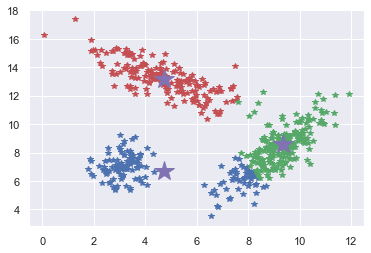

In [114]:
'''dEMONSTRATION of K Means Clustering'''
import sys
import pylab as plt
import numpy as np
plt.ion()

def show(X, C, centroids, keep = False):
    import time
    time.sleep(0.5)
    plt.cla()
    plt.plot(X[C == 0, 0], X[C == 0, 1], '*b',
         X[C == 1, 0], X[C == 1, 1], '*r',
         X[C == 2, 0], X[C == 2, 1], '*g')
    plt.plot(centroids[:,0],centroids[:,1],'*m',markersize=20)
    plt.draw()
    if keep :
        plt.ioff()
        plt.show()

# generate 3 cluster data
# data = np.genfromtxt('data1.csv', delimiter=',')
m1, cov1 = [9, 8], [[1.5, 2], [1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5], [-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5], [-0.1, 0.5]]
data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)
X = np.vstack((data1,np.vstack((data2,data3))))
np.random.shuffle(X)

#Finding Centroid
centroids, C = kMeans(X, K = 3, plot_progress = show)
show(X, C, centroids, True)

#### Another method of K-Means Clustering

In [115]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [116]:
# Importing the dataset
data = pd.read_csv('./dataset/xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


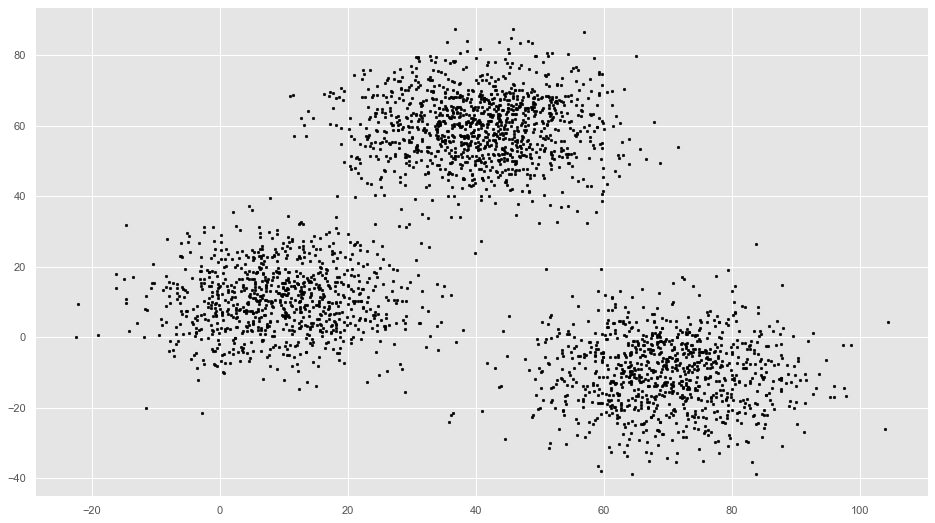

In [117]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [118]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [119]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[22. 31.]
 [27. 79.]
 [31. 76.]]


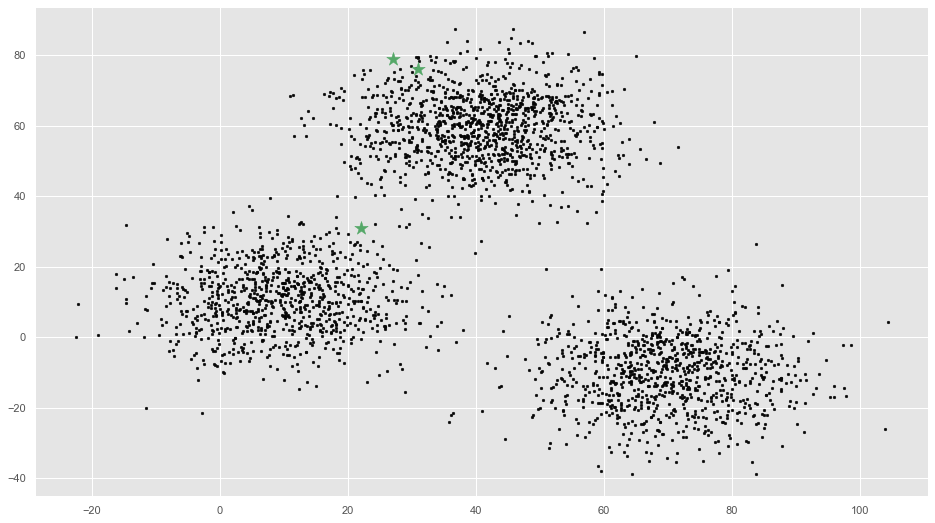

In [120]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [121]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

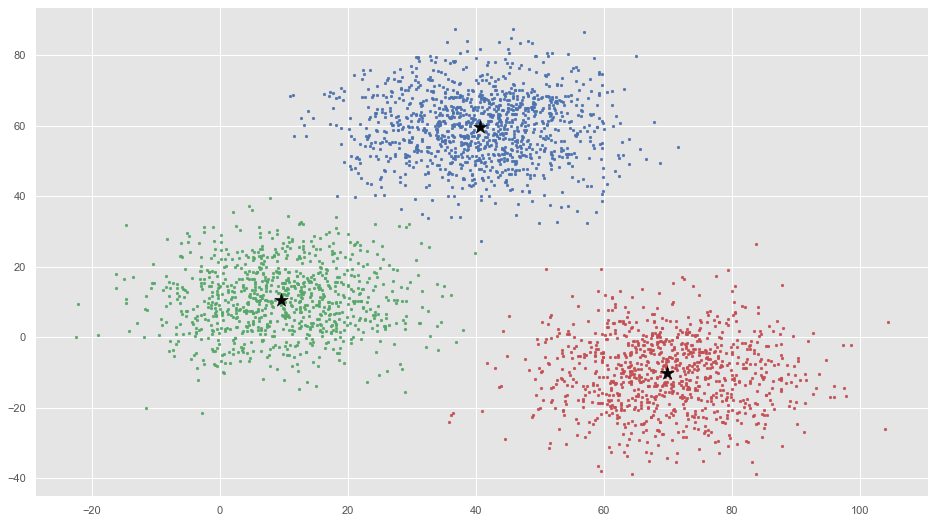

In [122]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

##### Adaboost Algorithm using numpy in Python

In [132]:
#import
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm 
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

In [133]:
#Least square regression
class LeastSquaresRegression(object):
    def __init__(self):
        self.weights = []
    
    def calcLeastSquares(self, X, y):
        xtranspose = np.transpose(X)
        xtransx = np.dot(xtranspose, X)
        if xtransx.shape[0] != xtransx.shape[1]:
            raise ValueError('Needs to be a square matrix for inverse')
        matinv = np.linalg.inv(xtransx)
        xtransy = np.dot(xtranspose, y)
        self.weights = np.dot(matinv, xtransy)

    def makePredictions(self, X):
        class_output = np.dot(X, self.weights)
        return np.sign(class_output)

In [134]:
class Boosting(object):

    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.N = self.X_train.shape[0]
        self.y_train = y_train
        self.weights = np.ones(self.N)/self.N
        self.epsilont = []
        self.alphas = []
        self.classifiers = []
        self.histogram = {}
        #self.num_estimators = T
        
    def doBoosting(self):
#         for t in range(self.num_estimators):
        for t in range(1500):
            output = np.random.choice(self.N, self.N, p=self.weights)
            
            for t in output:
                self.histogram[t] = self.histogram.get(t, 0) + 1
            
#             print output
            B_Xtrain = self.X_train[output]
            B_ytrain = self.y_train[output]
        
            ls = LeastSquaresRegression()
            ls.calcLeastSquares(B_Xtrain, B_ytrain)
#             print ls.weights
            Y_pred = ls.makePredictions(self.X_train)
            
#             print Y_pred
            
            e_t = np.sum((Y_pred != self.y_train) * self.weights)
#             print e_t
            if e_t > 0.5:
                ls.weights = -ls.weights
                Y_pred = ls.makePredictions(self.X_train)
                e_t = np.sum((Y_pred != self.y_train) * self.weights)
            
#             print e_t
            self.epsilont.append(e_t)

            alpha_t = 0.5 * np.log((1 - e_t)/e_t)
            self.alphas.append(alpha_t)
            self.classifiers.append(ls)
            
#             print alpha_t   
            self.weights = self.weights * np.exp(-alpha_t* Y_pred * self.y_train)
            self.weights = self.weights / np.sum(self.weights)

In [137]:
X_train = np.genfromtxt('./dataset/ml_boosting/X_train.csv', delimiter=',')
y_train = np.genfromtxt('dataset/ml_boosting/y_train.csv')
X_test = np.genfromtxt('./dataset/ml_boosting/X_test.csv', delimiter=',')
y_test = np.genfromtxt('./dataset/ml_boosting/y_test.csv')


def append_column_one(data):    
    append_ones = np.ones((data.shape[0],1))
    data = np.hstack((append_ones, data))
    return data

X_train = append_column_one(X_train)
X_test = append_column_one(X_test)

In [138]:
training_error = []
testing_error = []

boost = Boosting(X_train, y_train)
boost.doBoosting()

for t in tqdm(range(1, 1501)):
    sum_train = np.zeros(X_train.shape[0])
    sum_test = np.zeros(X_test.shape[0])
    for i in range(t):
        alpha = boost.alphas[i]
        classifier = boost.classifiers[i]
#             print X_train.shape
#             print classifier.weights.shape
#             print np.dot(X_train, classifier.weights).shape
        sum_train += (alpha * classifier.makePredictions(X_train))
        sum_test += (alpha * classifier.makePredictions(X_test))
    fboost_train_pred = np.sign(sum_train)
    fboost_test_pred = np.sign(sum_test)

    training_error.append(np.sum(fboost_train_pred != y_train)/y_train.shape[0])
    testing_error.append(np.sum(fboost_test_pred != y_test)/y_test.shape[0])

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:31<00:00, 47.72it/s]


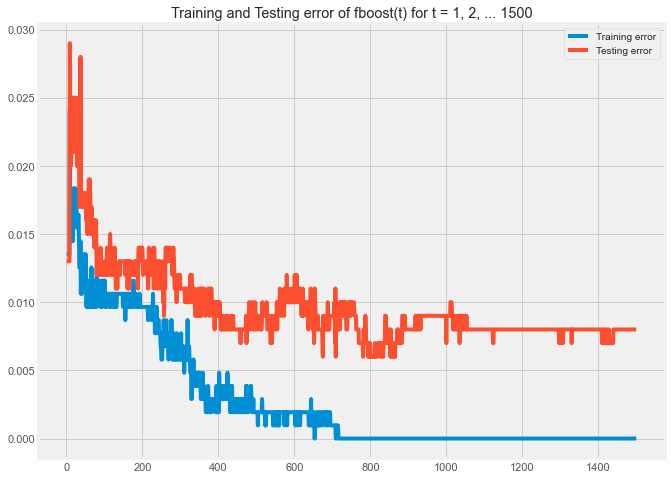

In [139]:
#plotting
plt.figure()
plt.plot(range(1,1501), training_error, label="Training error")
plt.plot(range(1,1501), testing_error, label="Testing error")
plt.title("Training and Testing error of fboost(t) for t = 1, 2, ... 1500")
plt.legend()
plt.show()

In [140]:
#Upper bound on the training error as a function of t
training_upper_bound = []
for t in tqdm(range(1, 1501)):
    ub = 0
    for i in range(t):
        epsilon = boost.epsilont[i]
        ub += np.power((0.5 - epsilon), 2)
    training_upper_bound.append(np.exp(-2 * ub))

100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 449.20it/s]


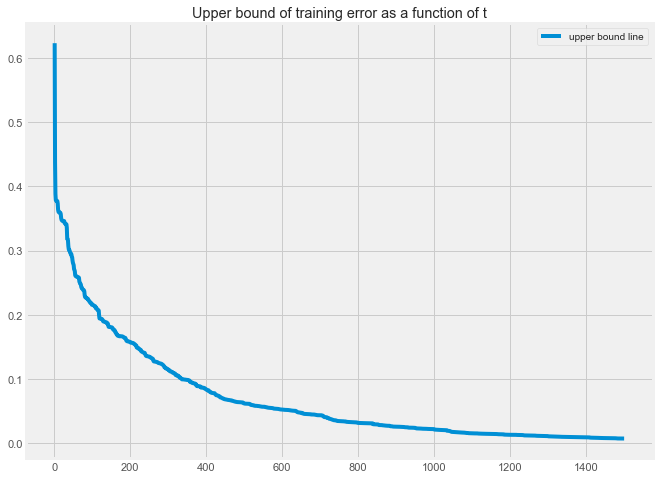

In [141]:
plt.figure()
plt.plot(range(1, 1501), training_upper_bound, label="upper bound line")
plt.title("Upper bound of training error as a function of t")
plt.legend()
plt.show()

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


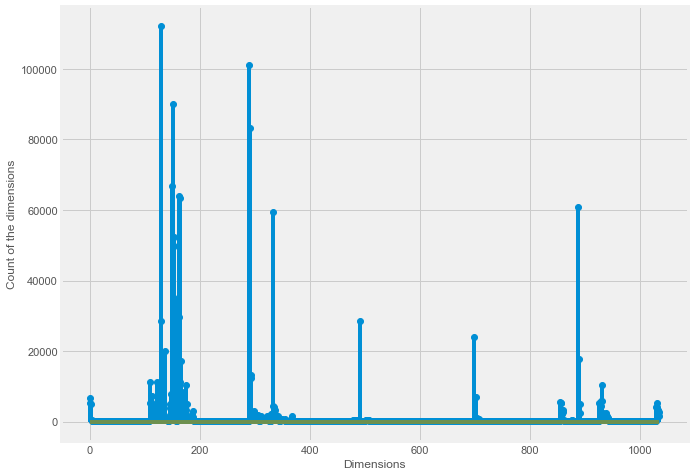

In [144]:
#histogram
plt.figure()
plt.stem(list(boost.histogram.keys()), boost.histogram.values())
#plt.stem([list(boost.histogram.keys()), boost.histogram.values(), linefmt=None, markerfmt=None, basefmt=None)
plt.xlabel("Dimensions")
plt.ylabel("Count of the dimensions")
plt.show()

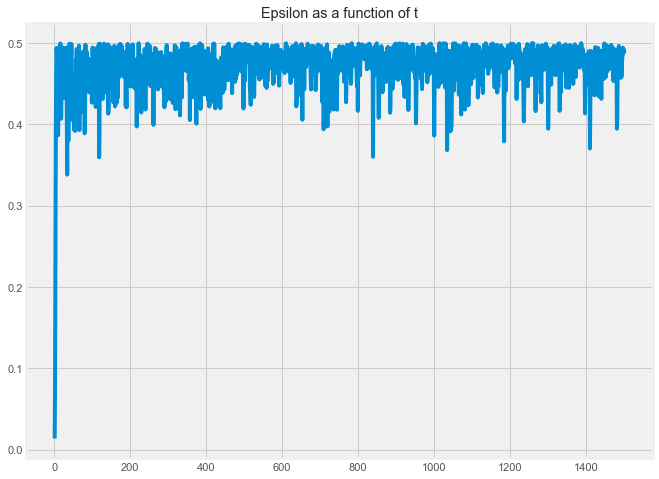

In [145]:
## Epsilon
plt.figure()
plt.plot(range(1, 1501), boost.epsilont)
plt.title("Epsilon as a function of t")
plt.show()

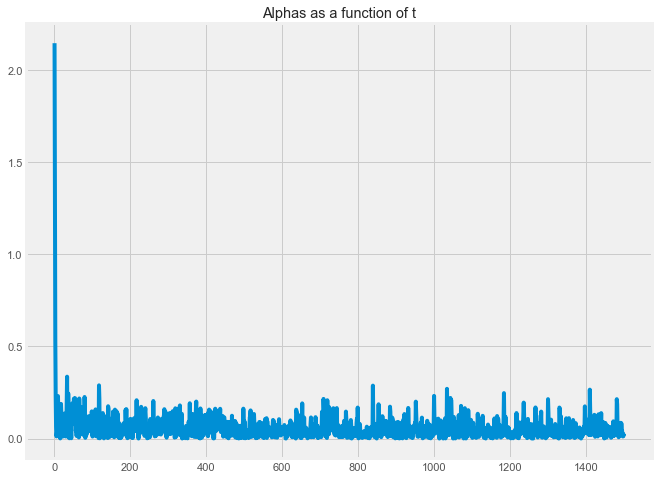

In [146]:
## Alphas
plt.figure()
plt.plot(range(1, 1501), boost.alphas)
plt.title("Alphas as a function of t")
plt.show()

#### Boosting from scratch with Python by using Create a Decision Stump

In [147]:
"""
Create a Decision Stump
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps


# Load in the data and define the column labels


dataset = pd.read_csv('./dataset/mushrooms.csv',header=None)
dataset = dataset.sample(frac=1)
dataset.columns = ['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
             'habitat']



# Encode the feature values from strings to integers since the sklearn DecisionTreeClassifier only takes numerical values
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])

    
    
Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1)


X = dataset.drop('target',axis=1)
Y = dataset['target'].where(dataset['target']==1,-1)



predictions = np.mean(cross_validate(Tree_model,X,Y,cv=100)['test_score'])


print('The accuracy is: ',predictions*100,'%')

The accuracy is:  73.06022282445046 %


With a number of  50 base models we receive an accuracy of  98.67076923076922 %


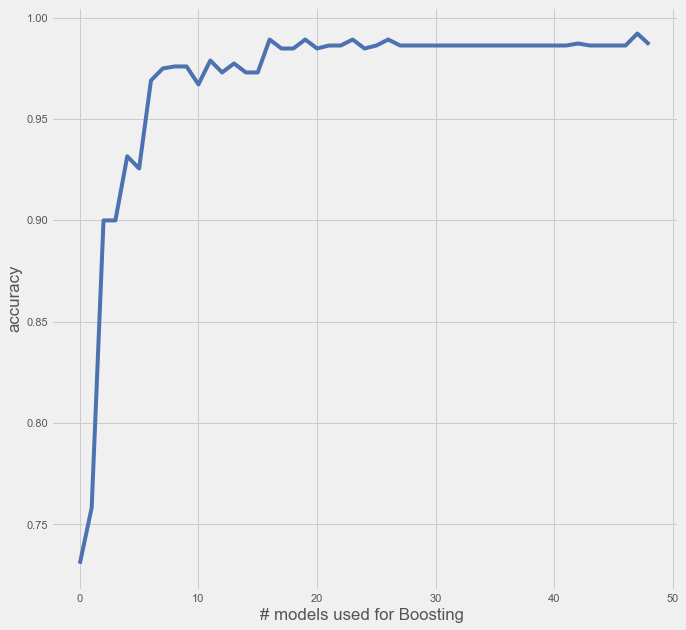

In [148]:
class Boosting:

    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    
    def fit(self):
        # Set the descriptive features and the target feature
        X = self.dataset.drop(['target'],axis=1)
        Y = self.dataset['target'].where(self.dataset['target']==1,-1)

        # Initialize the weights of each sample with wi = 1/N and create a dataframe in which the evaluation is computed
        Evaluation = pd.DataFrame(Y.copy())
        Evaluation['weights'] = 1/len(self.dataset) # Set the initial weights w = 1/N
        

        # Run the boosting algorithm by creating T "weighted models"
        
        alphas = [] 
        models = []
        
        for t in range(self.T):

            # Train the Decision Stump(s)
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1) # Mind the deth one --> Decision Stump
            
            # We know that we must train our decision stumps on weighted datasets where the weights depend on the results of
            # the previous decision stumps. To accomplish that, we use the 'weights' column of the above created 
            # 'evaluation dataframe' together with the sample_weight parameter of the fit method.
            # The documentation for the sample_weights parameter sais: "[...] If None, then samples are equally weighted."
            # Consequently, if NOT None, then the samples are NOT equally weighted and therewith we create a WEIGHTED dataset 
            # which is exactly what we want to have.
            model = Tree_model.fit(X,Y,sample_weight=np.array(Evaluation['weights'])) 
            
            # Append the single weak classifiers to a list which is later on used to make the 
            # weighted decision
            models.append(model)
            predictions = model.predict(X)
            score = model.score(X,Y)

            # Add values to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['target'],1,0)
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['target'],1,0)

            # Calculate the misclassification rate and accuracy
            accuracy = sum(Evaluation['evaluation'])/len(Evaluation['evaluation'])
            misclassification = sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])


            # Caclulate the error
            err = np.sum(Evaluation['weights']*Evaluation['misclassified'])/np.sum(Evaluation['weights'])
 
   
            # Calculate the alpha values
            alpha = np.log((1-err)/err)
            alphas.append(alpha)


            # Update the weights wi --> These updated weights are used in the sample_weight parameter
            # for the training of the next decision stump. 
            Evaluation['weights'] *= np.exp(alpha*Evaluation['misclassified'])

            #print('The Accuracy of the {0}. model is : '.format(t+1),accuracy*100,'%')
            #print('The missclassification rate is: ',misclassification*100,'%')
        
        self.alphas = alphas
        self.models = models
            
    def predict(self):
        X_test = self.test_dataset.drop(['target'],axis=1).reindex(range(len(self.test_dataset)))
        Y_test = self.test_dataset['target'].reindex(range(len(self.test_dataset))).where(self.dataset['target']==1,-1)
    
        # With each model in the self.model list, make a prediction 
        
        accuracy = []
        predictions = []
        
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha*model.predict(X_test) # We use the predict method for the single decisiontreeclassifier models in the list
            predictions.append(prediction)
            self.accuracy.append(np.sum(np.sign(np.sum(np.array(predictions),axis=0))==Y_test.values)/len(predictions[0]))
            self.predictions = np.sign(np.sum(np.array(predictions),axis=0))        


######Plot the accuracy of the model against the number of stump-models used##########

number_of_base_learners = 50

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(number_of_base_learners):
    model = Boosting(dataset,i,dataset)
    model.fit()
    model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
plt.show()        